In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from src.oracle import Oracle
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
WINDOW = 3600 # 1 hrs # NOTE this is way longer than the actual contract
PERIOD = 86400 # 1 day

def gen_gbm(S0,mu,sigma, dt, T):
    W = np.random.normal(loc=0, scale=np.sqrt(dt), size=int(T / dt))
    S = S0 * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) * dt + sigma * W))
    return(S)

In [5]:
# Test oracle with price updates every minute
oracle = Oracle(WINDOW)

start = int(datetime.now().timestamp())
times = [int(start + dt*60) for dt in range(0, PERIOD//60)]

df = pd.DataFrame()
df['timestamp'] = times
df['spot'] = gen_gbm(S0=1800,mu=0.05, sigma=0.2, dt=1/1440,T=1)
df['oracle'] = df.apply(lambda row: oracle.price(row['timestamp'], row['spot']), axis=1)
df.index = pd.to_datetime(df['timestamp'], unit='s')
df.head()

,timestamp,spot,oracle
timestamp,,,
2023-10-14 18:19:45,1697307585,1787.135453,1787.135453
2023-10-14 18:20:45,1697307645,1801.137403,1787.366885
2023-10-14 18:21:45,1697307705,1820.498523,1787.914502
2023-10-14 18:22:45,1697307765,1798.315411,1788.086414
2023-10-14 18:23:45,1697307825,1791.739886,1788.146801


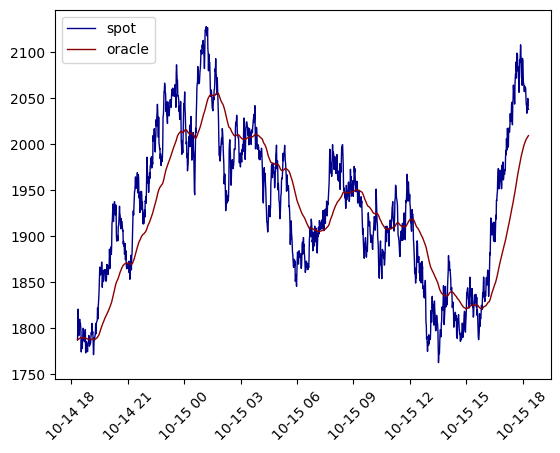

In [6]:
f, ax = plt.subplots()

ax.plot(df.index, df['spot'], label='spot', c='darkblue', lw=1)
ax.plot(df.index, df['oracle'], label='oracle', c='darkred', lw=1)
ax.legend()
ax.tick_params(axis='x', rotation=45)